In [65]:
import tensorflow as tf

In [66]:
import keras

In [68]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [69]:
import librosa 
audio_path = 'MammaMia.m4a' 
x , sr = librosa.load(audio_path)
librosa.load(audio_path, sr=44100)


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

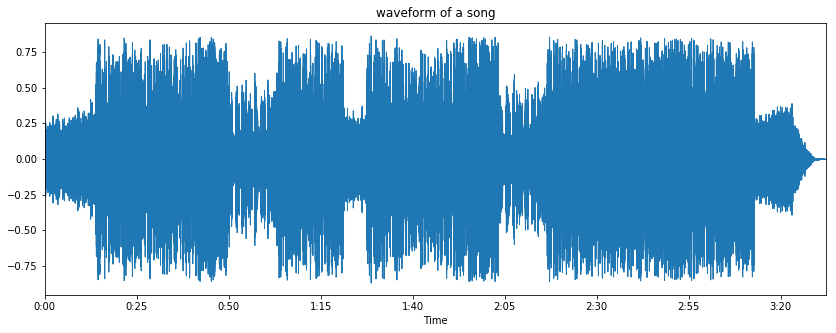

In [70]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
plt.title('waveform of a song')
librosa.display.waveplot(x, sr=sr)


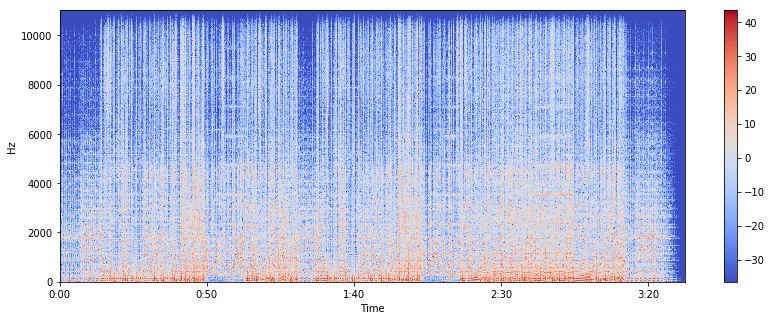

In [71]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [7]:
#unzip 

import tarfile 
myfile = tarfile.open('genres.tar')

myfile.extractall()
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [36]:

header = 'filename rmse chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


In [38]:
# creating csv file, storing features 
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y) 
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(rmse)} {np.mean(chroma_stft)}  {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [39]:
# reading csv file 
data = pd.read_csv('data.csv')

data.shape
# drop filename 
data = data.drop(['filename'],axis=1)
data.shape
data.head()

,rmse,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.127311,0.399025,2155.654923,2372.403604,5012.019693,0.087165,-109.165355,100.621500,-8.614721,47.358475,...,6.585774,-8.642621,4.912259,-15.442804,1.538750,-6.732474,1.417774,-3.961750,3.287460,blues
1,0.119072,0.269320,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
2,0.076970,0.278484,1198.607665,1573.308974,2478.376680,0.051988,-284.819504,108.785628,9.131956,51.259030,...,-3.303735,1.601561,2.660517,3.323455,3.258920,-4.551106,0.493845,5.937066,3.231544,blues
3,0.243217,0.408876,2206.771246,2191.473506,4657.388504,0.111526,-29.010990,104.532914,-30.974207,38.156392,...,10.786454,-10.558812,6.877709,-10.294858,6.967845,-10.256100,0.705014,-6.000722,1.348955,blues
4,0.235238,0.396258,2061.150735,2085.159448,4221.149475,0.113397,-38.965941,112.039843,-31.817035,38.240835,...,13.327049,-10.921602,9.795615,-5.031277,7.200982,-6.754969,2.663612,-4.380430,0.414055,blues


In [123]:
genre_list = data.iloc[:, -1] # creating a list and indexing it 
# print(genre_list)
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
# print(y)
print(len(y))
print(X.shape)

1000
(1000, 26)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [179]:
# create a convolutional neural network 

# from keras import backend as K
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               5400      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 7,410
Trainable params: 7,410
Non-trainable params: 0
_________________________________________________________________


In [180]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [181]:
history = model.fit(X_train, y_train, epochs=100, verbose=0,batch_size=128,
                   validation_data=(X_test,y_test))



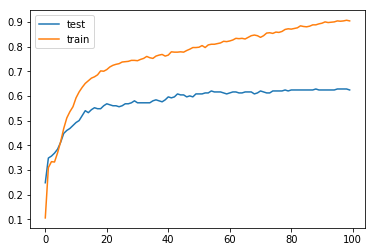

In [183]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['test', 'train'])

In [158]:
# accuracy 
test_loss, test_acc = model.evaluate(X_test,y_test)


500/500 [==============================] - 0s 260us/sample - loss: 1.0612 - acc: 0.6540


In [153]:
print(test_acc*100,'%')

40.40000140666962 %


In [115]:
# validating our approach 
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

print(x_val.shape)
print(y_val.shape)

(200, 26)
(200,)


In [116]:
# validation 
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 300 samples, validate on 200 samples
Epoch 1/30


InvalidArgumentError: Tensor dense_10_input:0, specified in either feed_devices or fetch_devices was not found in the Graph